In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
remates = pd.read_csv('../dataframe/remates.csv',index_col=0)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
remates.head()

,fecha,id_evento,minuto,segundo,categoria_evento,equipo,jugador,x,y,auto_gol,remate_asistido,cabeza,penal,remate_jugada_regular,remate_contraataque,remate_balon_parado,remate_tiro_esquina,remate_tiro_libre,remate_jugada_lateral,evento_accion1,x_accion1,y_accion1,minuto_accion1,segundo_accion1,x_est,y_est,x_accion1_est,y_accion1_est,distancia_est,distancia_accion1_est,dist_a,dist_b,dist_c,angulo,angulo_est,diff_segundos,gol,tiro_salvado_accion1,drible_accion1,remate_fallido_accion1,poste_accion1
0,1,113,16,20,remate fallido,Alavés,Rubén Sobrino,89.6,51.5,False,True,True,False,True,False,False,False,False,False,pase,80.3,80.0,16,19,0.896,0.515,0.803,0.800,0.105076,0.358900,10.911004,12.159359,9.6,48.810825,0.271171,1,False,False,False,False,False
1,1,323,51,8,tiro salvado,Alavés,Mubarak Wakaso,88.0,73.6,False,False,False,False,True,False,False,False,False,False,pase,97.2,88.3,51,4,0.880,0.736,0.972,0.883,0.264756,0.384022,22.303363,30.831153,9.6,9.644234,0.053579,4,False,False,False,False,False
2,1,489,78,18,remate fallido,Alavés,Adrián Marín,94.1,58.1,False,True,False,False,False,False,True,False,False,False,pase,69.9,27.3,78,16,0.941,0.581,0.699,0.273,0.100210,0.377001,6.760178,14.185204,9.6,36.203086,0.201128,2,False,False,False,False,False
3,1,68,5,9,remate fallido,Athletic Club,Yeray Álvarez,87.6,40.1,False,True,True,False,False,False,True,False,False,False,pase,66.4,76.6,5,7,0.876,0.401,0.664,0.766,0.158673,0.428546,19.231485,13.407834,9.6,27.494225,0.152746,2,False,False,False,False,False
4,1,111,8,37,remate fallido,Athletic Club,Yuri Berchiche Izeta,85.8,66.8,False,True,False,False,True,False,False,False,False,False,pase,98.1,24.4,8,34,0.858,0.668,0.981,0.244,0.219973,0.256704,18.591396,25.849565,9.6,16.478620,0.091548,3,False,False,False,False,False


In [81]:
remates[remates['jugador']=='Raúl García']

,fecha,equipo,jugador,x,y,gol,xg,penal
125,1,Leganés,Raúl García,76.5,71.3,False,0.029023,False
261,2,Athletic Club,Raúl García,88.5,28.1,False,0.007408,False
264,2,Athletic Club,Raúl García,96.1,69.1,False,0.139087,False
519,3,Athletic Club,Raúl García,87.6,59.0,False,0.009287,False
520,3,Athletic Club,Raúl García,86.0,61.2,False,0.040452,False
521,3,Athletic Club,Raúl García,95.3,61.2,False,0.038072,False
523,3,Athletic Club,Raúl García,90.5,66.3,False,0.012762,False
524,3,Athletic Club,Raúl García,94.4,57.7,False,0.107323,False
753,4,Athletic Club,Raúl García,74.4,69.0,False,0.037163,False
1029,5,Athletic Club,Raúl García,89.0,62.0,False,0.017439,False


In [80]:
remates.shape

(9245, 8)

In [88]:
remates[remates['gol']==True]['gol'].sum()

955

In [5]:
xg = pd.read_csv('../dataframe/xg.csv',index_col=0)

In [6]:
xg.tail()

,xg
9240,0.137197
9241,0.632518
9242,0.036499
9243,0.053424
9244,0.735689


In [7]:
xg.shape

(9245, 1)

In [8]:
xg = np.array(xg)

In [9]:
xg.shape

(9245, 1)

In [10]:
remates['xg'] = xg

In [11]:
remates = remates.reset_index(drop=True)

In [12]:
remates

,fecha,id_evento,minuto,segundo,categoria_evento,equipo,jugador,x,y,auto_gol,remate_asistido,cabeza,penal,remate_jugada_regular,remate_contraataque,remate_balon_parado,remate_tiro_esquina,remate_tiro_libre,remate_jugada_lateral,evento_accion1,x_accion1,y_accion1,minuto_accion1,segundo_accion1,x_est,y_est,x_accion1_est,y_accion1_est,distancia_est,distancia_accion1_est,dist_a,dist_b,dist_c,angulo,angulo_est,diff_segundos,gol,tiro_salvado_accion1,drible_accion1,remate_fallido_accion1,poste_accion1,xg
0,1,113,16,20,remate fallido,Alavés,Rubén Sobrino,89.6,51.5,False,True,True,False,True,False,False,False,False,False,pase,80.3,80.0,16,19,0.896,0.515,0.803,0.800,0.105076,0.358900,10.911004,12.159359,9.6,48.810825,0.271171,1,False,False,False,False,False,0.038298
1,1,323,51,8,tiro salvado,Alavés,Mubarak Wakaso,88.0,73.6,False,False,False,False,True,False,False,False,False,False,pase,97.2,88.3,51,4,0.880,0.736,0.972,0.883,0.264756,0.384022,22.303363,30.831153,9.6,9.644234,0.053579,4,False,False,False,False,False,0.008442
2,1,489,78,18,remate fallido,Alavés,Adrián Marín,94.1,58.1,False,True,False,False,False,False,True,False,False,False,pase,69.9,27.3,78,16,0.941,0.581,0.699,0.273,0.100210,0.377001,6.760178,14.185204,9.6,36.203086,0.201128,2,False,False,False,False,False,0.559082
3,1,68,5,9,remate fallido,Athletic Club,Yeray Álvarez,87.6,40.1,False,True,True,False,False,False,True,False,False,False,pase,66.4,76.6,5,7,0.876,0.401,0.664,0.766,0.158673,0.428546,19.231485,13.407834,9.6,27.494225,0.152746,2,False,False,False,False,False,0.019351
4,1,111,8,37,remate fallido,Athletic Club,Yuri Berchiche Izeta,85.8,66.8,False,True,False,False,True,False,False,False,False,False,pase,98.1,24.4,8,34,0.858,0.668,0.981,0.244,0.219973,0.256704,18.591396,25.849565,9.6,16.478620,0.091548,3,False,False,False,False,False,0.008572
5,1,157,11,49,remate fallido,Athletic Club,Iñaki Williams,91.7,41.5,False,True,True,False,False,False,True,False,False,False,pase,73.5,5.9,11,45,0.917,0.415,0.735,0.059,0.118802,0.514496,15.677372,9.087354,9.6,34.006850,0.188927,4,False,False,False,False,False,0.037391
6,1,201,14,16,tiro salvado,Athletic Club,Yeray Álvarez,88.0,48.0,False,True,True,False,False,False,True,False,False,False,duelo aéreo,90.4,48.0,14,15,0.880,0.480,0.904,0.480,0.121655,0.098061,13.792752,12.322337,9.6,42.672805,0.237071,1,False,False,False,False,False,0.067378
7,1,184,14,19,tiro salvado,Athletic Club,Óscar De Marcos,88.0,39.0,False,False,False,False,False,False,True,False,False,False,tiro salvado,88.0,48.0,14,16,0.880,0.390,0.880,0.480,0.162788,0.121655,19.840363,13.507035,9.6,25.459668,0.141443,3,False,True,False,False,False,0.033750
8,1,307,25,59,tiro salvado,Athletic Club,Óscar De Marcos,90.7,41.3,False,True,False,False,True,False,False,False,False,False,pase,90.2,18.2,25,57,0.907,0.413,0.902,0.182,0.127350,0.332758,16.393291,10.084642,9.6,32.686499,0.181592,2,False,False,False,False,False,0.057625
9,1,316,26,57,gol,Athletic Club,Peru Nolaskoain,95.6,60.4,False,True,True,False,False,False,False,True,False,False,duelo aéreo,95.6,60.2,26,56,0.956,0.604,0.956,0.602,0.112925,0.111086,7.121798,15.824032,9.6,22.012888,0.122294,1,True,False,False,False,False,0.516770


In [13]:
remates = remates[['fecha','equipo','jugador','x','y','gol','xg','penal']]

In [14]:
remates_sin_penales = remates[remates['penal']!=True]

In [15]:
remates_sin_penales = remates_sin_penales.drop('penal',1)

In [16]:
remates_sin_penales[(remates_sin_penales['jugador']=='Luis Suárez')&(remates_sin_penales['gol']==True)]

,fecha,equipo,jugador,x,y,gol,xg
549,3,Barcelona,Luis Suárez,95.2,56.1,True,0.292268
790,4,Barcelona,Luis Suárez,97.1,48.2,True,0.514448
2334,10,Barcelona,Luis Suárez,85.5,49.1,True,0.072876
2336,10,Barcelona,Luis Suárez,89.6,34.9,True,0.045001
2568,11,Barcelona,Luis Suárez,93.9,52.0,True,0.539762
2576,11,Barcelona,Luis Suárez,96.3,57.1,True,0.463288
3605,15,Barcelona,Luis Suárez,99.4,61.0,True,0.620708
3861,16,Barcelona,Luis Suárez,90.9,50.1,True,0.668077
4342,18,Barcelona,Luis Suárez,79.6,40.6,True,0.020206
4609,19,Barcelona,Luis Suárez,89.3,65.8,True,0.008164


In [ ]:
remates_sin_penales.to_csv('../dataframe/remates_sin_penales.csv',decimal=',')

In [17]:
remates_sin_penales[remates_sin_penales['jugador']=='Luis Suárez'][['gol','xg']].head()

,gol,xg
32,False,0.007704
38,False,0.008398
41,False,0.014261
49,False,0.008398
285,False,0.068686


In [18]:
remates_sin_penales[remates_sin_penales['jugador']=='Luis Suárez'][['xg']].sum()

xg    14.334896
dtype: float64

In [19]:
remates_sin_penales[remates_sin_penales['jugador']=='Luis Suárez'][['gol']].sum()

gol    17
dtype: int64

In [20]:
remates_sin_penales[['xg']].sum()

xg    848.126195
dtype: float64

In [21]:
remates_sin_penales[['gol']].sum()

gol    849
dtype: int64

In [22]:
remates.shape

(9245, 8)

In [23]:
gol_suma = remates_sin_penales.groupby(['jugador','equipo'])['gol'].agg(['sum']).reset_index().rename(columns={'sum':'gol'})
xg_suma = remates_sin_penales.groupby(['jugador','equipo'])['xg'].agg(['sum']).reset_index().rename(columns={'sum':'xg'})
remates_suma = remates_sin_penales.groupby(['jugador','equipo'])['xg'].agg(['count']).reset_index().rename(columns={'count':'remates'})

In [24]:
data_frames = [gol_suma, xg_suma, remates_suma]

In [25]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['jugador','equipo'],how='outer'), data_frames)

In [26]:
df['dif_gol_xg'] = df['gol'] - df['xg']
df['xg/remate'] = df['xg']/df['remates']

In [27]:
df.sort_values('remates',ascending=False).head(10)

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate
244,Lionel Messi,Barcelona,32.0,21.141307,165,10.858693,0.128129
342,Raúl de Tomás Gómez,Rayo Vallecano,14.0,15.058147,115,-1.058147,0.130940
33,Antoine Griezmann,Atlético de Madrid,12.0,10.753216,110,1.246784,0.097757
252,Luis Suárez,Barcelona,17.0,14.334896,108,2.665104,0.132731
231,Karim Benzema,Real Madrid,18.0,13.567836,101,4.432164,0.134335
123,Ezequiel Ávila,Huesca,9.0,7.336065,87,1.663935,0.084323
52,Borja Iglesias,Espanyol,14.0,12.776727,87,1.223273,0.146859
282,Maximiliano Gómez,Celta de Vigo,12.0,10.735766,81,1.264234,0.132540
351,Rodrigo Moreno,Valencia CF,8.0,12.677331,79,-4.677331,0.160473
222,Juan Camilo Hernández,Huesca,2.0,8.492223,78,-6.492223,0.108875


In [28]:
#### Minutos jugados

In [29]:
dataAggJug = pd.read_csv(r'C:\Users\DELUX\Desktop\consultoria_futbol\comparativoJugadores\dataAggJug.csv')

In [30]:
dataAggJug.head()

,fecha,id_jugador,estadistica,num_estadistica,jugador
0,1,212769,diving_save,1,Unai Simón
1,1,212769,leftside_pass,2,Unai Simón
2,1,212769,accurate_pass,10,Unai Simón
3,1,212769,rightside_pass,1,Unai Simón
4,1,212769,attempts_conceded_ibox,9,Unai Simón


In [31]:
minJug = dataAggJug[dataAggJug['estadistica']=='mins_played']

In [32]:
minJug.head()

,fecha,id_jugador,estadistica,num_estadistica,jugador
34,1,212769,mins_played,90,Unai Simón
111,1,59062,mins_played,65,Óscar De Marcos
180,1,197319,mins_played,90,Yeray Álvarez
249,1,242831,mins_played,90,Peru Nolaskoain
328,1,42670,mins_played,90,Yuri Berchiche Izeta


In [33]:
minJug = minJug.drop('estadistica',1).rename(columns={'num_estadistica':'minJug'})

In [34]:
minJug.head()

,fecha,id_jugador,minJug,jugador
34,1,212769,90,Unai Simón
111,1,59062,65,Óscar De Marcos
180,1,197319,90,Yeray Álvarez
249,1,242831,90,Peru Nolaskoain
328,1,42670,90,Yuri Berchiche Izeta


In [35]:
minJug = minJug.groupby(['id_jugador','jugador']).sum().reset_index().drop('fecha',1)

In [36]:
minJug.head()

,id_jugador,jugador,minJug
0,7261,Daniele Bonera,233
1,10316,Joaquín Sánchez Rodríguez,1694
2,11129,David López,1820
3,11602,Borja Fernández,839
4,14028,Juan José Camacho Barnola,34


In [37]:
minJug = minJug[['jugador','minJug']]

In [38]:
### Merge remates y minutos jugados

In [39]:
df = df.merge(minJug,how='left',on='jugador')

In [40]:
df.head()

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug
0,Abdoulaye Ba,Rayo Vallecano,1.0,1.217590,9,-0.217590,0.135288,2111
1,Abel Ruiz,Barcelona,0.0,0.092618,1,-0.092618,0.092618,21
2,Aday Benítez,Girona,0.0,0.234196,9,-0.234196,0.026022,647
3,Adnan Januzaj,Real Sociedad,1.0,1.916128,32,-0.916128,0.059879,1252
4,Adrià Pedrosa,Espanyol,1.0,0.222781,6,0.777219,0.037130,760


In [41]:
df.isnull().any()

jugador       False
equipo        False
gol           False
xg            False
remates       False
dif_gol_xg    False
xg/remate     False
minJug        False
dtype: bool

In [42]:
df['xg_p90'] = df['xg']/df['minJug']*90
df['gol_p90'] = df['gol']/df['minJug']*90
df['remates_p90'] = df['remates']/df['minJug']*90

In [43]:
df[(df['minJug']>1000)].sort_values('gol',ascending=False).head(30)

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90
244,Lionel Messi,Barcelona,32.0,21.141307,165,10.858693,0.128129,2710,0.702110,1.062731,5.479705
231,Karim Benzema,Real Madrid,18.0,13.567836,101,4.432164,0.134335,2961,0.412396,0.547112,3.069909
252,Luis Suárez,Barcelona,17.0,14.334896,108,2.665104,0.132731,2827,0.456364,0.541210,3.438274
442,Wissam Ben Yedder,Sevilla,16.0,13.967920,74,2.032080,0.188756,2819,0.445943,0.510819,2.362540
165,Iago Aspas,Celta de Vigo,15.0,8.355791,64,6.644209,0.130559,2258,0.333047,0.597874,2.550930
52,Borja Iglesias,Espanyol,14.0,12.776727,87,1.223273,0.146859,3081,0.373225,0.408958,2.541383
71,Cristhian Stuani,Girona,14.0,9.232849,72,4.767151,0.128234,2731,0.304268,0.461369,2.372757
345,Raúl de Tomás Gómez,Rayo Vallecano,14.0,15.058147,115,-1.058147,0.130940,2818,0.480920,0.447126,3.672818
175,Iñaki Williams,Athletic Club,13.0,11.251061,75,1.748939,0.150014,3036,0.333529,0.385375,2.223320
33,Antoine Griezmann,Atlético de Madrid,12.0,10.753216,110,1.246784,0.097757,3202,0.302245,0.337289,3.091818


In [44]:
df[df['equipo']=='Atlético de Madrid']

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90
33,Antoine Griezmann,Atlético de Madrid,12.0,10.753216,110,1.246784,0.097757,3202,0.302245,0.337289,3.091818
49,Borja Garcés,Atlético de Madrid,1.0,0.334347,3,0.665653,0.111449,19,1.583747,4.736842,14.210526
64,Carlos Isaac Muñoz,Atlético de Madrid,0.0,0.042340,1,-0.042340,0.042340,90,0.042340,0.000000,1.000000
98,Diego Da Silva Costa,Atlético de Madrid,2.0,1.291608,16,0.708392,0.080726,1114,0.104349,0.161580,1.292639
99,Diego Godín,Atlético de Madrid,3.0,2.203908,14,0.796092,0.157422,2507,0.079119,0.107698,0.502593
131,Filipe Luís Kasmirski,Atlético de Madrid,2.0,0.795685,10,1.204315,0.079568,2037,0.035155,0.088365,0.441826
145,Gelson Dany Batalha Martins,Atlético de Madrid,0.0,0.430033,5,-0.430033,0.086007,223,0.173556,0.000000,2.017937
206,Jorge Resurrección,Atlético de Madrid,3.0,1.337354,21,1.662646,0.063684,2587,0.046526,0.104368,0.730576
213,José Giménez,Atlético de Madrid,0.0,0.898956,15,-0.898956,0.059930,1772,0.045658,0.000000,0.761851
248,Lucas Hernández,Atlético de Madrid,1.0,0.560785,5,0.439215,0.112157,1118,0.045144,0.080501,0.402504


In [45]:
####

In [46]:
zonainf = pd.read_csv(r'../dataframe/coordJugZonaInfl.csv')

In [47]:
zonainf.head()

,fecha,jugador,x,y,zona_influencia_x,zona_influencia_y,zona_influencia_xy
0,1,Adrián Marín,58.152500,80.107500,4,5,28
1,1,Borja González Tomás,41.900000,37.950000,3,2,6
2,1,Daniel Torres,42.353846,64.329060,3,4,12
3,1,Fernando Pacheco,9.556731,50.411538,1,3,7
4,1,Guillermo Maripán,24.659091,68.254545,2,4,11


In [48]:
len(zonainf)

10550

In [49]:
zonainf = zonainf.reset_index(drop=True)

In [50]:
zonainf.head()

,fecha,jugador,x,y,zona_influencia_x,zona_influencia_y,zona_influencia_xy
0,1,Adrián Marín,58.152500,80.107500,4,5,28
1,1,Borja González Tomás,41.900000,37.950000,3,2,6
2,1,Daniel Torres,42.353846,64.329060,3,4,12
3,1,Fernando Pacheco,9.556731,50.411538,1,3,7
4,1,Guillermo Maripán,24.659091,68.254545,2,4,11


In [51]:
zonainf['zona_influencia_x'] = zonainf['zona_influencia_x'].astype(int)
zonainf['zona_influencia_y'] = zonainf['zona_influencia_y'].astype(int)
zonainf = zonainf.drop('zona_influencia_xy',1)

In [52]:
zonainf_media = zonainf.groupby('jugador').mean().reset_index()

In [53]:
zonainf_media = zonainf_media[['jugador','zona_influencia_x','x']]

In [54]:
zonainf_media[zonainf_media['jugador']=='Lionel Messi']

,jugador,zona_influencia_x,x
290,Lionel Messi,4.235294,64.391211


In [55]:
### Merge df con zonainfluencia_media

In [56]:
df = df.merge(zonainf_media,how='left',on='jugador')

In [57]:
df.head()

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x
0,Abdoulaye Ba,Rayo Vallecano,1.0,1.217590,9,-0.217590,0.135288,2111,0.051911,0.042634,0.383704,2.307692,31.844934
1,Abel Ruiz,Barcelona,0.0,0.092618,1,-0.092618,0.092618,21,0.396933,0.000000,4.285714,5.000000,69.039583
2,Aday Benítez,Girona,0.0,0.234196,9,-0.234196,0.026022,647,0.032578,0.000000,1.251932,4.000000,56.080759
3,Adnan Januzaj,Real Sociedad,1.0,1.916128,32,-0.916128,0.059879,1252,0.137741,0.071885,2.300319,4.600000,66.764206
4,Adrià Pedrosa,Espanyol,1.0,0.222781,6,0.777219,0.037130,760,0.026382,0.118421,0.710526,3.583333,50.618226


In [58]:
df.isnull().any()

jugador              False
equipo               False
gol                  False
xg                   False
remates              False
dif_gol_xg           False
xg/remate            False
minJug               False
xg_p90               False
gol_p90              False
remates_p90          False
zona_influencia_x    False
x                    False
dtype: bool

In [59]:
df[df['jugador']=='Luis Suárez']

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x
252,Luis Suárez,Barcelona,17.0,14.334896,108,2.665104,0.132731,2827,0.456364,0.54121,3.438274,4.470588,65.712997


In [60]:
top = df[(df['minJug']>1000)&(df['zona_influencia_x']>4)&(df['remates_p90']>1)].sort_values('xg_p90',ascending=False).reset_index(drop=True)

In [61]:
jugadores = df[(df['minJug']>1000)].sort_values('xg_p90',ascending=False).reset_index(drop=True)
jugadores = jugadores[jugadores['jugador']!='Raúl García']

In [62]:
y = []
np.random.seed(4)
for i in range(len(jugadores)):
    y.append(np.random.normal(0,0.001))
jugadores['y'] = y

In [63]:
jugadores['LS'] = np.where(jugadores['jugador']=='Luis Suárez',True,False)

In [89]:
jugadores['decil_golp90'] = pd.qcut(jugadores['gol_p90'].rank(method='first'), 10, labels=False)
jugadores['decil_xgp90'] = pd.qcut(jugadores['xg_p90'].rank(method='first'), 10, labels=False)
jugadores['decil_rematesp90'] = pd.qcut(jugadores['remates_p90'].rank(method='first'), 10, labels=False)
jugadores['decil_xg/remate'] = pd.qcut(jugadores['xg/remate'].rank(method='first'), 10, labels=False)
jugadores['decil_dif_gol_xg'] = pd.qcut(jugadores['dif_gol_xg'].rank(method='first'), 10, labels=False)

In [90]:
jugadores

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x,y,LS,decil_golp90,decil_xgp90,decil_rematesp90,decil_xg/remate,decil_dif_gol_xg
0,Lionel Messi,Barcelona,32.0,21.141307,165,10.858693,0.128129,2710,0.702110,1.062731,5.479705,4.235294,64.391211,0.000051,False,9,9,9,7,9
2,Raúl de Tomás Gómez,Rayo Vallecano,14.0,15.058147,115,-1.058147,0.130940,2818,0.480920,0.447126,3.672818,4.117647,61.505007,0.000500,False,9,9,9,7,1
3,Álvaro Morata,Atlético de Madrid,6.0,5.707454,30,0.292546,0.190248,1089,0.471690,0.495868,2.479339,4.312500,64.609102,-0.000996,False,9,9,8,9,6
4,Luis Suárez,Barcelona,17.0,14.334896,108,2.665104,0.132731,2827,0.456364,0.541210,3.438274,4.470588,65.712997,0.000694,True,9,9,9,8,9
5,Rodrigo Moreno,Valencia CF,8.0,12.677331,79,-4.677331,0.160473,2534,0.450260,0.284136,2.805841,4.181818,62.927859,-0.000418,False,8,9,9,9,0
6,Wissam Ben Yedder,Sevilla,16.0,13.967920,74,2.032080,0.188756,2819,0.445943,0.510819,2.362540,4.628571,68.013118,-0.001585,False,9,9,8,9,9
7,Roger Martí,Levante,11.0,9.218103,69,1.781897,0.133596,1894,0.438030,0.522703,3.278775,4.333333,63.523214,-0.000648,False,9,9,9,8,9
8,Borja González Tomás,Alavés,5.0,6.943805,33,-1.943805,0.210418,1449,0.431292,0.310559,2.049689,4.037037,60.490908,0.000599,False,9,9,8,9,0
9,Kevin Gameiro,Valencia CF,6.0,7.639767,36,-1.639767,0.212216,1605,0.428398,0.336449,2.018692,4.352941,63.629492,0.000332,False,9,9,8,9,0
10,Karim Benzema,Real Madrid,18.0,13.567836,101,4.432164,0.134335,2961,0.412396,0.547112,3.069909,4.250000,65.313535,-0.001147,False,9,9,9,8,9


In [66]:
top.describe()

,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.240964,5.834511,52.084337,0.406453,0.108771,1996.168675,0.251939,0.263923,2.311680,4.282540,63.476604
std,5.169305,3.927051,26.323598,2.483683,0.039961,623.182936,0.125229,0.168141,0.782968,0.153865,2.178907
min,0.000000,0.912840,15.000000,-6.492223,0.021005,1002.000000,0.062145,0.000000,1.143664,4.029412,58.506036
25%,3.000000,2.697016,32.000000,-0.987138,0.078841,1530.500000,0.146452,0.131090,1.748245,4.176471,61.981765
50%,5.000000,4.651392,46.000000,0.308936,0.108875,1894.000000,0.225860,0.253759,2.277840,4.258065,63.523214
75%,8.500000,8.060996,68.500000,1.612264,0.132904,2508.500000,0.333288,0.367100,2.672848,4.360681,64.751488
max,32.000000,21.141307,165.000000,10.858693,0.212216,3202.000000,0.702110,1.062731,5.479705,4.633333,69.467899


In [67]:
jugadores[jugadores['equipo']=='Barcelona']

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x,y,LS,decil_golp90,decil_xgp90,decil_rematesp90,decil_xg/remate
0,Lionel Messi,Barcelona,32.0,21.141307,165,10.858693,0.128129,2710,0.702110,1.062731,5.479705,4.235294,64.391211,0.000051,False,9,9,9,7
4,Luis Suárez,Barcelona,17.0,14.334896,108,2.665104,0.132731,2827,0.456364,0.541210,3.438274,4.470588,65.712997,0.000694,True,9,9,9,8
51,Philippe Coutinho Correia,Barcelona,5.0,4.583602,68,0.416398,0.067406,2022,0.204018,0.222552,3.026706,4.176471,62.929269,0.000837,False,8,8,9,3
70,Arturo Vidal,Barcelona,3.0,3.436050,24,-0.436050,0.143169,1927,0.160480,0.140114,1.120913,3.666667,51.658237,0.000158,False,7,7,6,8
95,Ousmane Dembélé,Barcelona,8.0,2.048440,39,5.951560,0.052524,1671,0.110329,0.430880,2.100539,4.413793,64.730733,-0.000374,False,9,6,8,2
106,Munir El Haddadi,Barcelona,1.0,1.340583,4,-0.340583,0.335146,1192,0.101219,0.075503,0.302013,4.260870,64.865917,0.001579,False,5,6,1,9
121,Gerard Piqué,Barcelona,4.0,2.970921,18,1.029079,0.165051,3150,0.084883,0.114286,0.514286,2.657143,35.519086,-0.000210,False,6,6,3,9
148,Ivan Rakitic,Barcelona,3.0,2.026726,36,0.973274,0.056298,2643,0.069015,0.102157,1.225880,3.617647,50.639182,-0.000080,False,6,5,6,3
205,Clément Lenglet,Barcelona,1.0,0.850033,6,0.149967,0.141672,1935,0.039536,0.046512,0.279070,2.521739,33.414255,0.001600,False,4,3,0,8
225,Sergio Busquets,Barcelona,0.0,0.958745,8,-0.958745,0.119843,2719,0.031735,0.000000,0.264803,3.285714,47.198766,-0.000311,False,1,2,0,7


In [95]:
top[top['jugador']=='Philippe Coutinho Correia']

,jugador,equipo,gol,xg,remates,dif_gol_xg,xg/remate,minJug,xg_p90,gol_p90,remates_p90,zona_influencia_x,x
47,Philippe Coutinho Correia,Barcelona,5.0,4.583602,68,0.416398,0.067406,2022,0.204018,0.222552,3.026706,4.176471,62.929269


In [69]:
### goles

In [70]:
goles_dist = top[['gol','equipo','jugador']]

In [71]:
goles_dist.head()

,gol,equipo,jugador
0,32.0,Barcelona,Lionel Messi
1,14.0,Rayo Vallecano,Raúl de Tomás Gómez
2,6.0,Atlético de Madrid,Álvaro Morata
3,17.0,Barcelona,Luis Suárez
4,8.0,Valencia CF,Rodrigo Moreno


In [72]:
goles_dist.describe()

,gol
count,83.000000
mean,6.240964
std,5.169305
min,0.000000
25%,3.000000
50%,5.000000
75%,8.500000
max,32.000000


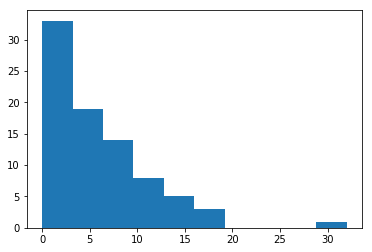

In [73]:
plt.hist(goles_dist['gol'])
plt.show()

In [ ]:
goles_dist.to_csv('../dataframe/goles_dist.csv',decimal=',')

In [74]:
### xG_p90

In [75]:
xgp90_dist = top[['xg_p90','equipo','jugador']]

In [76]:
xgp90_dist.head()

,xg_p90,equipo,jugador
0,0.702110,Barcelona,Lionel Messi
1,0.480920,Rayo Vallecano,Raúl de Tomás Gómez
2,0.471690,Atlético de Madrid,Álvaro Morata
3,0.456364,Barcelona,Luis Suárez
4,0.450260,Valencia CF,Rodrigo Moreno


In [77]:
xgp90_dist['xg_p90'] = round(xgp90_dist['xg_p90'],2)

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
xgp90_dist.describe()

,xg_p90
count,83.000000
mean,0.251807
std,0.125573
min,0.060000
25%,0.145000
50%,0.230000
75%,0.330000
max,0.700000


In [ ]:
xgp90_dist['decil'] = pd.qcut(xgp90_dist['xg_p90'].rank(memoryviewthod='first'), 10, labels=False)
xgp90_dist['LS'] = np.where(xgp90_dist['jugador']=='Luis Suárez',True,False)

In [ ]:
#rango = xgp90_dist['xg_p90'].iloc[0] - xgp90_dist['xg_p90'].iloc[-1]

In [ ]:
y = []
np.random.seed(4)
for i in range(len(xgp90_dist)):
    y.append(np.random.normal(0,0.001))
xgp90_dist['y'] = y

In [ ]:
np.random.normal(0,0.01)

In [ ]:
xgp90_dist.head()

In [ ]:
plt.hist(xgp90_dist['xg_p90'])
plt.show()

In [ ]:
xgp90_dist.to_csv('../dataframe/xgp90_dist.csv',decimal=',')

In [91]:
jugadores.to_csv('../dataframe/jugadores.csv',decimal=',')